In [11]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp

### Getting Keypoints

In [12]:
marker = mp.solutions.holistic
lines = mp.solutions.drawing_utils

In [13]:
def object_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable =True
    image =cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [14]:
def draw_landmarks(image, results):
    landmarks = [results.pose_landmarks, results.left_hand_landmarks, results.right_hand_landmarks]
    connections = [marker.POSE_CONNECTIONS, marker.HAND_CONNECTIONS, marker.HAND_CONNECTIONS]


    for i, landmark_type in enumerate(landmarks):
        lines.draw_landmarks(image, landmark_type, connections[i])

In [15]:
def landmark_style(image, results):
    landmarks = [results.pose_landmarks, results.left_hand_landmarks, results.right_hand_landmarks]
    connections = [marker.POSE_CONNECTIONS, marker.HAND_CONNECTIONS, marker.HAND_CONNECTIONS]
    drawing_specs = [
        (lines.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
         lines.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)),
        (lines.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
         lines.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)),
        (lines.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
         lines.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))
    ]

    for i, landmark_type in enumerate(landmarks):
        lines.draw_landmarks(
            image, 
            landmark_type, 
            connections[i],
            landmark_drawing_spec=drawing_specs[i][0],
            connection_drawing_spec=drawing_specs[i][1]
        )

# Assuming mp

In [16]:
stream = cv2.VideoCapture(0)
with marker.Holistic(min_detection_confidence=0.6, min_tracking_confidence =0.6) as holistic:
    while stream.isOpened():
        ret, frame = stream.read()
        image, results = object_detection(frame, holistic)
        print(results)
        landmark_style(image, results)
        cv2.imshow("feed", image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    stream.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [17]:
draw_landmarks(frame, results)

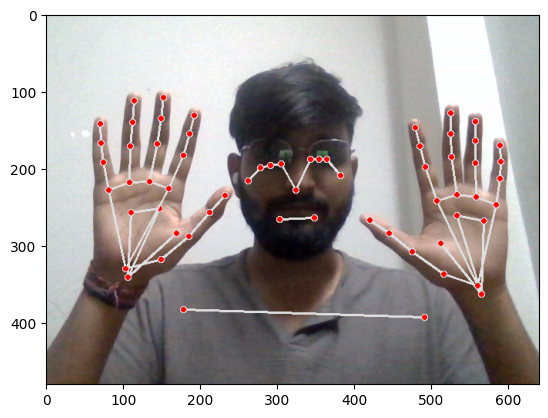

In [18]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

### 3. Extracting the Keypoint Values

In [9]:
results.left_hand_landmarks

In [10]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)


In [11]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [12]:
extract_keypoints(results)

array([ 5.48660219e-01,  5.49877107e-01, -1.17433786e+00,  9.99970376e-01,
        5.93269765e-01,  4.69172776e-01, -1.09228718e+00,  9.99946713e-01,
        6.17385149e-01,  4.69532281e-01, -1.09231210e+00,  9.99921083e-01,
        6.36808574e-01,  4.72327322e-01, -1.09252954e+00,  9.99928474e-01,
        5.19543290e-01,  4.75920111e-01, -1.06565058e+00,  9.99949872e-01,
        4.96778488e-01,  4.79785413e-01, -1.06466067e+00,  9.99939740e-01,
        4.78360087e-01,  4.83499467e-01, -1.06496787e+00,  9.99957502e-01,
        6.69735909e-01,  5.22293806e-01, -5.69857955e-01,  9.99916911e-01,
        4.62470055e-01,  5.26778400e-01, -4.15130556e-01,  9.99957919e-01,
        6.01010263e-01,  6.29385173e-01, -9.85735536e-01,  9.99963939e-01,
        4.99543905e-01,  6.34929538e-01, -9.45114255e-01,  9.99965608e-01,
        8.52195144e-01,  9.63549078e-01, -3.18160057e-01,  9.96216536e-01,
        3.28515589e-01,  9.25219834e-01, -2.94197470e-01,  9.99378800e-01,
        9.51451302e-01,  

In [13]:
extract_keypoints(results).shape

(258,)

In [14]:
result_test = extract_keypoints(results)

In [15]:
np.array(result_test).shape

(258,)

In [16]:
np.save('0', result_test)

In [17]:
sample =np.load('0.npy')


### 3. Folder for collecting the sample

In [18]:
print(os.path)

<module 'ntpath' from 'c:\\Users\\yadav\\AppData\\Local\\Programs\\Python\\Python38\\lib\\ntpath.py'>


In [19]:
# Path for exported data, numpy arrays
path = './Data' 
# os.mkdir(path)

# wordss that we try to detect
words = np.array(['Namaste', 'Hello', 'Great', 'Bye', 'Thank You'])

# Thirty videos worth of data
videos = 30

# Videos are going to be 30 frames in length
frames_per_video = 30
#60

# Folder start
start_folder = 0

In [20]:
words

array(['Namaste', 'Hello', 'Great', 'Bye', 'Thank You'], dtype='<U9')

In [21]:
for word in words: 
    #dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, words))).astype(int))
    for sequence in range(0,videos):
        try: 
            os.makedirs(os.path.join(path, word, str(sequence)))
        except:
            pass

### 5 Collecting the key point for the training and testing set

In [22]:
stream = cv2.VideoCapture(0)
# Set mediapipe model 
with marker.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for word in words:
        for sequence in range(start_folder, start_folder+videos):
            for frame_num in range(frames_per_video):
                ret, frame = stream.read()
                image, results = object_detection(frame, holistic)
                landmark_style(image, results)
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, (f"Collecting frames for {word} Video Number {sequence}"), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(100)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(word, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(path, word, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    stream.release()
    cv2.destroyAllWindows()

In [23]:
stream.release()
cv2.destroyAllWindows()

### 6 Data Preprocessing and training

In [24]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [25]:
label_map = {label: num for num, label in enumerate(words)}

In [26]:
label_map

{'Namaste': 0, 'Hello': 1, 'Great': 2, 'Bye': 3, 'Thank You': 4}

In [27]:
sequences, labels = [], []
for word in words:
    for sequence in range(videos):
        window = []
        for frame_num in range(frames_per_video):
            res = np.load(os.path.join(path, word, str(sequence), f"{frame_num}.npy"))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[word])

In [28]:
np.array(sequences).shape

(150, 30, 258)

In [29]:
np.array(labels).shape

(150,)

In [30]:
X = np.array(sequences)

In [31]:
X.shape

(150, 30, 258)

In [32]:
y = to_categorical(labels).astype(int)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [34]:
X_train.shape

(142, 30, 258)

In [35]:
X_test.shape

(8, 30, 258)

In [36]:
y_train.shape

(142, 5)

In [37]:
y_test.shape

(8, 5)

<h2> LSTM</h2>

In [38]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import TensorBoard

In [39]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [40]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(words.shape[0], activation='softmax'))

In [41]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
5/5 [==============================] - 5s 58ms/step - loss: 1.5745 - categorical_accuracy: 0.2746
Epoch 2/2000
5/5 [==============================] - 0s 58ms/step - loss: 1.3445 - categorical_accuracy: 0.3803
Epoch 3/2000
5/5 [==============================] - 0s 59ms/step - loss: 1.1328 - categorical_accuracy: 0.6620
Epoch 4/2000
5/5 [==============================] - 0s 60ms/step - loss: 0.9205 - categorical_accuracy: 0.7042
Epoch 5/2000
5/5 [==============================] - 0s 62ms/step - loss: 1.0715 - categorical_accuracy: 0.6831
Epoch 6/2000
5/5 [==============================] - 0s 65ms/step - loss: 1.0626 - categorical_accuracy: 0.5423
Epoch 7/2000
5/5 [==============================] - 0s 64ms/step - loss: 0.9675 - categorical_accuracy: 0.5915
Epoch 8/2000
5/5 [==============================] - 0s 65ms/step - loss: 0.8481 - categorical_accuracy: 0.7254
Epoch 9/2000
5/5 [==============================] - 0s 64ms/step - loss: 0.6646 - categorical_accuracy: 0.7254
E

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            82688     
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 237317 (927.02 KB)
Trainable params: 23731

In [43]:
res = model.predict(X_test)

1/1 [==============================] - 1s 500ms/step


In [44]:
words[np.argmax(res[1])]

'Namaste'

In [45]:
words[np.argmax(y_test[1])]

'Namaste'

# Evaluations

In [46]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [47]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 38ms/step


In [48]:
yhat

array([[7.41840061e-14, 2.17887774e-19, 9.99999523e-01, 5.21680874e-07,
        1.40048073e-09],
       [9.32731450e-01, 0.00000000e+00, 1.02313072e-25, 0.00000000e+00,
        6.72685131e-02],
       [9.99999762e-01, 0.00000000e+00, 2.67318491e-26, 0.00000000e+00,
        1.95138810e-07],
       [1.44805070e-18, 9.99999642e-01, 4.15126294e-10, 3.76649552e-07,
        2.69843538e-14],
       [1.00000000e+00, 0.00000000e+00, 3.41287340e-37, 0.00000000e+00,
        2.91215653e-14],
       [7.67809427e-11, 1.89595633e-16, 9.99926686e-01, 7.31883556e-05,
        1.10440155e-07],
       [1.00000000e+00, 0.00000000e+00, 3.85528355e-24, 0.00000000e+00,
        2.79597878e-09],
       [5.48462387e-11, 9.00311647e-08, 1.21672791e-04, 9.99878168e-01,
        6.36642072e-09]], dtype=float32)

In [49]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [50]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 4]],

       [[7, 1],
        [0, 0]],

       [[6, 0],
        [0, 2]],

       [[6, 0],
        [1, 1]]], dtype=int64)

In [51]:
accuracy_score(ytrue, yhat)

0.875

# real time Evalution

In [52]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, words, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[1], -1)
        cv2.putText(output_frame, words[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

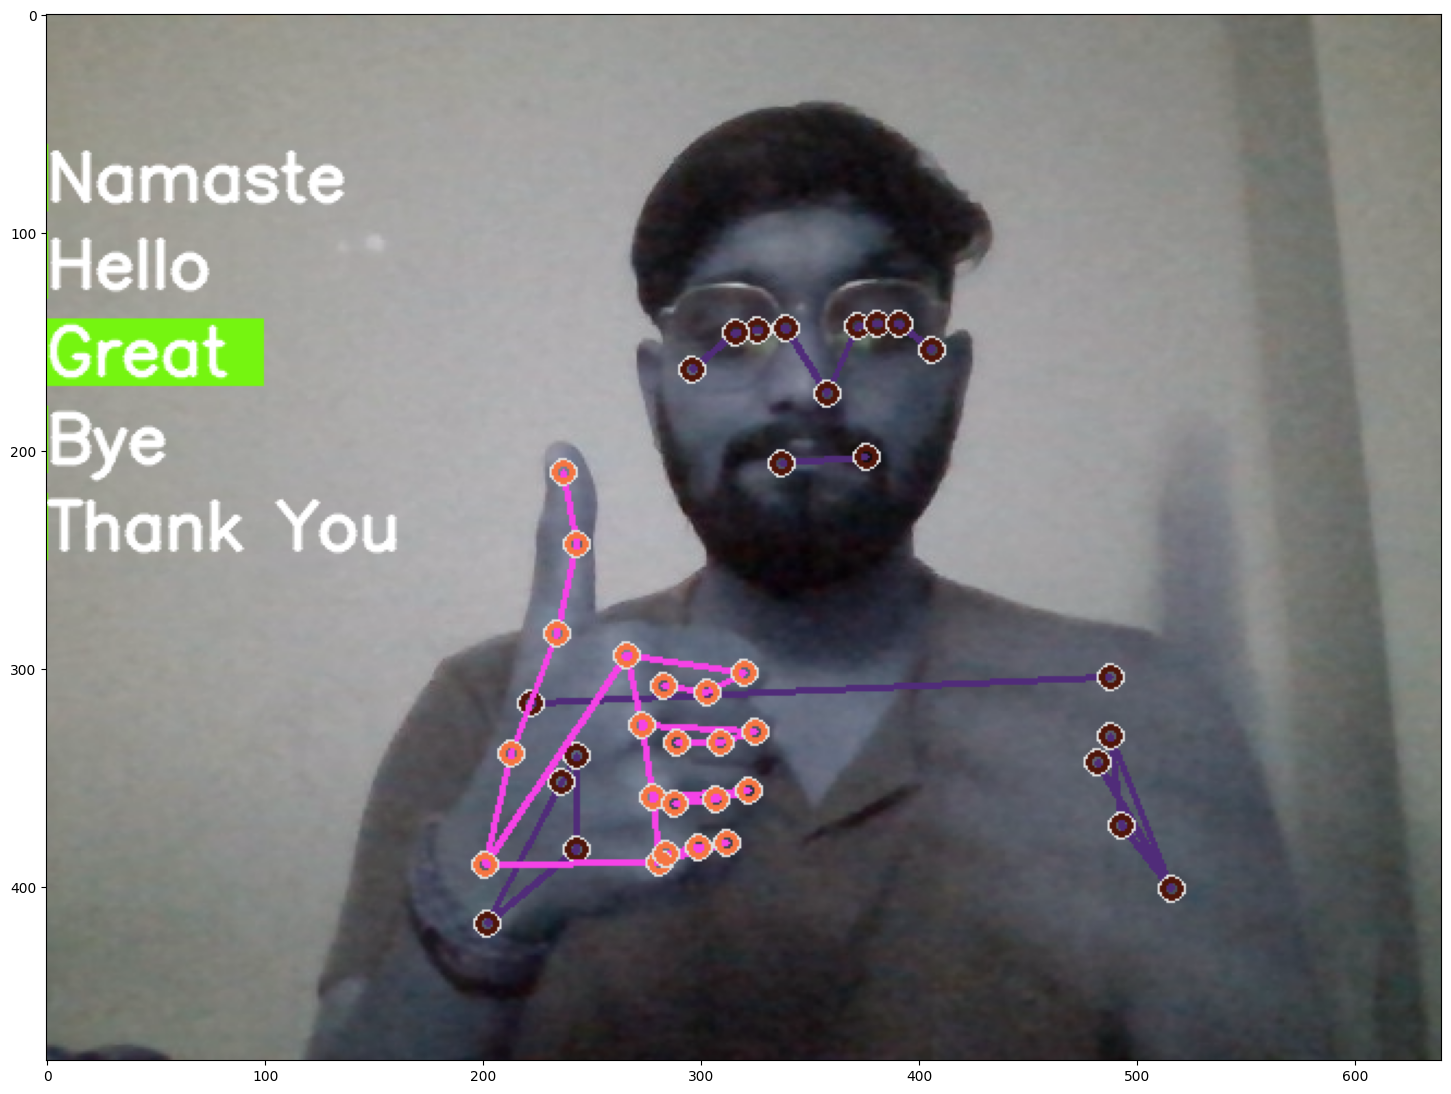

In [62]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, words, image, colors))

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with marker.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        image, results = object_detection(frame, holistic)
        print(results)
        landmark_style(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(words[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
            # 3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                    if res[np.argmax(res)] > threshold: 
                        
                        if len(sentence) > 0: 
                            if words[np.argmax(res)] != sentence[-1]:
                                sentence.append(words[np.argmax(res)])
                        else:
                            sentence.append(words[np.argmax(res)])
    
            if len(sentence) > 5: 
                    sentence = sentence[-5:]

            image = prob_viz(res, words, image, colors)
            
        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [63]:
cap.release()
cv2.destroyAllWindows()